In [1]:
import pandas as pd
import numpy as np
from itertools import combinations
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
import contextily as ctx

ruta_base = 'Dades/'
ruta_archivo = ruta_base + 'dataset_procesado.parquet'  
#ruta_archivo = ruta_base + 'dataset_combinado_final.parquet'  

df = pd.read_parquet(ruta_archivo)

In [2]:
estaciones_por_momento = df.groupby('FECHA')['coord_id'].nunique()

fechas_con_menos_de_512_momentos = estaciones_por_momento[estaciones_por_momento != 512]
print(fechas_con_menos_de_512_momentos)


Series([], Name: coord_id, dtype: int64)


In [3]:
estaciones_por_momento 

FECHA
2020-01-01 01:00:00    512
2020-01-01 02:00:00    512
2020-01-01 03:00:00    512
2020-01-01 04:00:00    512
2020-01-01 05:00:00    512
                      ... 
2022-12-31 20:00:00    512
2022-12-31 21:00:00    512
2022-12-31 22:00:00    512
2022-12-31 23:00:00    512
2023-01-01 00:00:00    512
Name: coord_id, Length: 26304, dtype: int64

In [4]:

numero_de_fechas_unicas = df['FECHA'].nunique()

print(f"El número de fechas únicas en el dataset es: {numero_de_fechas_unicas}")


El número de fechas únicas en el dataset es: 26304


In [5]:

#df = df.drop(columns=['longitude', 'latitude', 'time'])
df = df.dropna(subset=['LATITUD_G', 'LONGITUD_G'])
df.sort_values(by=['FECHA', 'LATITUD_G', 'LONGITUD_G'], inplace=True)

df['FECHA'] = pd.to_datetime(df['FECHA'])

df = df.groupby('coord_id').resample('2H', on='FECHA').mean().reset_index()


In [6]:
df

,coord_id,FECHA,LATITUD_G,LONGITUD_G,ALTITUD,C6H6,CO,NO,NO2,NOx,...,atrend_NOx,aseasonality_NOx,atrend_O3,aseasonality_O3,atrend_PM10,aseasonality_PM10,atrend_PM25,aseasonality_PM25,atrend_SO2,aseasonality_SO2
0,35.893_-5.3147,2020-01-01 00:00:00,35.89300,-5.31470,1.0,0.000000,0.347965,2.010000,6.670000,9.760000,...,12.428112,-0.369622,88.203516,1.986382,11.537143,-3.669428,6.239110,-2.591732,4.287545,0.052430
1,35.893_-5.3147,2020-01-01 02:00:00,35.89300,-5.31470,1.0,0.000000,0.374648,1.995000,6.020000,9.075000,...,12.453416,-1.756485,88.177157,2.404220,11.570079,5.681059,6.265051,-0.411516,4.288720,0.201971
2,35.893_-5.3147,2020-01-01 04:00:00,35.89300,-5.31470,1.0,0.000000,0.335099,2.025000,5.405000,8.500000,...,12.489158,-4.255614,88.138719,5.636418,11.615501,0.678393,6.301254,-1.556986,4.290370,-0.183435
3,35.893_-5.3147,2020-01-01 06:00:00,35.89300,-5.31470,1.0,0.000000,0.338651,2.020000,5.350000,8.415000,...,12.527688,-3.180498,88.095256,4.023665,11.662547,-5.523265,6.339550,2.129498,4.292112,-0.115101
4,35.893_-5.3147,2020-01-01 08:00:00,35.89300,-5.31470,1.0,0.000000,0.350928,2.115000,6.930000,10.160000,...,12.569648,-2.229936,88.045405,3.790837,11.711353,-3.081915,6.380527,-0.732772,4.293955,-0.097063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734331,43.68627_-7.50778,2022-12-31 16:00:00,43.68627,-7.50778,60.0,0.663103,0.271546,5.458692,11.716628,19.879539,...,8.933518,-2.075649,54.547794,-3.596198,13.727512,-0.129847,5.668887,1.421719,1.120223,-0.045034
6734332,43.68627_-7.50778,2022-12-31 18:00:00,43.68627,-7.50778,60.0,0.663103,0.271546,5.458692,11.716628,19.879539,...,8.955580,10.883547,54.427124,-3.229456,13.844593,0.624727,5.745799,0.934463,1.119972,-0.044095
6734333,43.68627_-7.50778,2022-12-31 20:00:00,43.68627,-7.50778,60.0,0.663103,0.271546,5.458692,11.716628,19.879539,...,8.976300,3.331718,54.315674,-9.003791,13.952146,2.016620,5.817119,1.155156,1.119750,-0.022413
6734334,43.68627_-7.50778,2022-12-31 22:00:00,43.68627,-7.50778,60.0,0.663103,0.271546,5.458692,11.716628,19.879539,...,8.996079,-1.789761,54.213085,11.039204,14.051411,-3.484233,5.883687,2.168516,1.119552,0.011389


In [7]:
df.columns

Index(['coord_id', 'FECHA', 'LATITUD_G', 'LONGITUD_G', 'ALTITUD', 'C6H6', 'CO',
       'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM25', 'SO2', 'TIPO_ESTACION_FONDO',
       'TIPO_ESTACION_INDUSTRIAL', 'TIPO_ESTACION_TRAFICO', 'TIPO_AREA_RURAL',
       'TIPO_AREA_SUBURBANA', 'TIPO_AREA_URBANA', 'ZONA_AGRICOLA',
       'ZONA_AGRICOLA/NATURALEZA', 'ZONA_COMERCIAL/INDUSTRIAL',
       'ZONA_COMERCIAL/INDUSTRIAL/AGRICOLA', 'ZONA_COMERCIAL/NATURALEZA',
       'ZONA_DESCONOCIDO', 'ZONA_INDUSTRIAL', 'ZONA_INDUSTRIAL/AGRICOLA',
       'ZONA_INDUSTRIAL/NATURALEZA', 'ZONA_MAR(CERCA)', 'ZONA_MONTAÑA',
       'ZONA_NATURALEZA', 'ZONA_PARQUE', 'ZONA_RESIDENCIAL',
       'ZONA_RESIDENCIAL/AGRICOLA', 'ZONA_RESIDENCIAL/AGRICOLA/NATURALEZA',
       'ZONA_RESIDENCIAL/COMERCIAL', 'ZONA_RESIDENCIAL/COMERCIAL/INDUSTRIAL',
       'ZONA_RESIDENCIAL/COMERCIAL/NATURALEZA', 'ZONA_RESIDENCIAL/INDUSTRIAL',
       'ZONA_RESIDENCIAL/INDUSTRIAL/AGRICOLA',
       'ZONA_RESIDENCIAL/INDUSTRIAL/NATURALEZA', 'ZONA_RESIDENCIAL/NAT

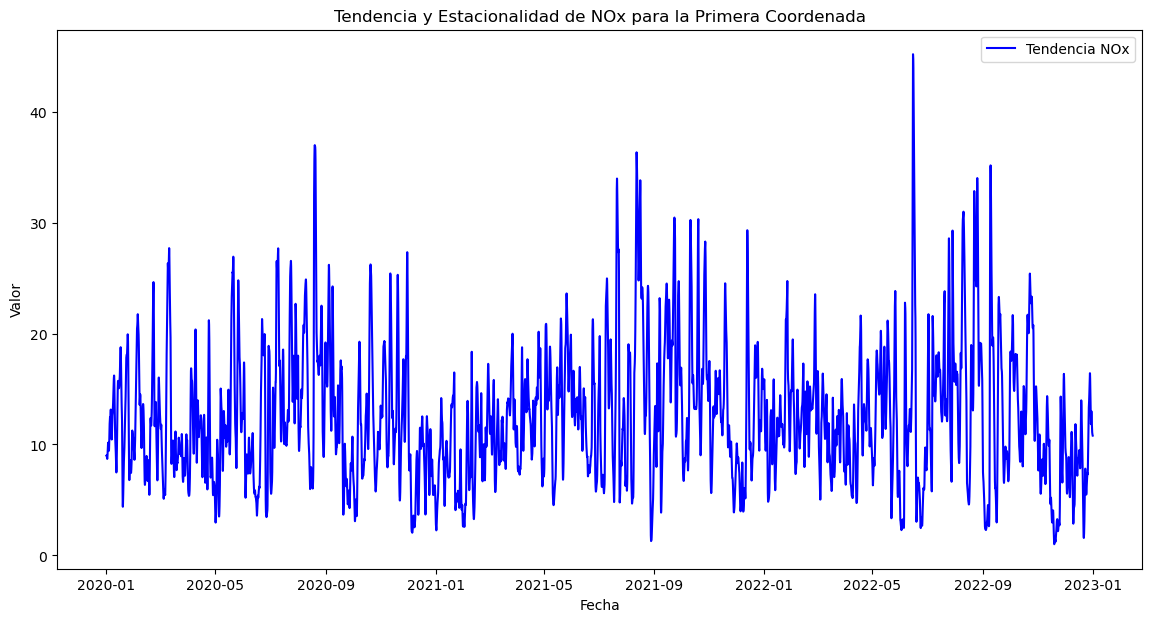

In [8]:

import matplotlib.pyplot as plt
primera_latitud = df['LATITUD_G'].unique()[9]
primera_longitud = df['LONGITUD_G'].unique()[9]

df_primera_coordenada = df[(df['LATITUD_G'] == primera_latitud) & (df['LONGITUD_G'] == primera_longitud)]



df_primera_coordenada.set_index('FECHA', inplace=True)

plt.figure(figsize=(14, 7))
plt.plot(df_primera_coordenada.index, df_primera_coordenada['atrend_NO2'], label='Tendencia NOx', color='blue')

#plt.plot(df_primera_coordenada.index, df_primera_coordenada['seasonality_NOx'], label='Estacionalidad NOx', color='orange')

plt.title('Tendencia y Estacionalidad de NOx para la Primera Coordenada')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()


In [9]:
import pandas as pd
import numpy as np
from concurrent.futures import ThreadPoolExecutor, as_completed
import pyarrow as pa
import pyarrow.parquet as pq

df.sort_values(by=['FECHA', 'LATITUD_G', 'LONGITUD_G'], inplace=True)

def haversine_adjusted(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = np.abs(lon2 - lon1)
    dlon = np.where(dlon > np.pi, 2 * np.pi - dlon, dlon)
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = 6371 * c
    return distance

specific_time_ds = df[df['FECHA'] == "2022-12-31 16:00:00"].reset_index(drop=True)

columns = ['LATITUD_G', 'LONGITUD_G', 'Closest_Coords', 'Distances']
closest_points_df = pd.DataFrame(columns=columns)

def calculate_distances_for_point(point_idx):
    point_lat, point_lon = specific_time_ds.loc[point_idx, ['LATITUD_G', 'LONGITUD_G']]
    distances = specific_time_ds.apply(lambda row: haversine_adjusted(point_lat, point_lon, row['LATITUD_G'], row['LONGITUD_G']) if row.name != point_idx else np.inf, axis=1)
    closest_indices = distances.nsmallest(11).index[1:]
    closest_coords = specific_time_ds.loc[closest_indices, ['LATITUD_G', 'LONGITUD_G']].values.tolist()
    closest_distances = distances.loc[closest_indices].tolist()
    
    return {'LATITUD_G': point_lat, 'LONGITUD_G': point_lon, 'Closest_Coords': [closest_coords], 'Distances': [closest_distances]}

results_list = []

with ThreadPoolExecutor(max_workers=4) as executor:
    futures = [executor.submit(calculate_distances_for_point, idx) for idx in range(len(specific_time_ds))]
    processed = 0
    for future in as_completed(futures):
        result = future.result()
        results_list.append(result)
        processed += 1
        print(f"Procesado: {processed}/{len(specific_time_ds)} coordenadas")


results_df = pd.DataFrame(results_list)

results_expanded = results_df.explode(column=['Closest_Coords', 'Distances'])

table = pa.Table.from_pandas(results_expanded, preserve_index=False)
pq.write_table(table, 'edges.parquet')

print("Cálculo de distancias completado y guardado.")


Procesado: 1/512 coordenadas
Procesado: 2/512 coordenadas
Procesado: 3/512 coordenadas
Procesado: 4/512 coordenadas
Procesado: 5/512 coordenadas
Procesado: 6/512 coordenadas
Procesado: 7/512 coordenadas
Procesado: 8/512 coordenadas
Procesado: 9/512 coordenadas
Procesado: 10/512 coordenadas
Procesado: 11/512 coordenadas
Procesado: 12/512 coordenadas
Procesado: 13/512 coordenadas
Procesado: 14/512 coordenadas
Procesado: 15/512 coordenadas
Procesado: 16/512 coordenadas
Procesado: 17/512 coordenadas
Procesado: 18/512 coordenadas
Procesado: 19/512 coordenadas
Procesado: 20/512 coordenadas
Procesado: 21/512 coordenadas
Procesado: 22/512 coordenadas
Procesado: 23/512 coordenadas
Procesado: 24/512 coordenadas
Procesado: 25/512 coordenadas
Procesado: 26/512 coordenadas
Procesado: 27/512 coordenadas
Procesado: 28/512 coordenadas
Procesado: 29/512 coordenadas
Procesado: 30/512 coordenadas
Procesado: 31/512 coordenadas
Procesado: 32/512 coordenadas
Procesado: 33/512 coordenadas
Procesado: 34/512 c

In [10]:
import torch
import pandas as pd

ruta_parquet = "edges.parquet"

edges = pd.read_parquet(ruta_parquet)
print(edges)

coordenadas = edges[['LATITUD_G', 'LONGITUD_G']].drop_duplicates().reset_index(drop=True)
coordenadas['node_index'] = coordenadas.index

index_map = {tuple(row): i for i, row in coordenadas[['LATITUD_G', 'LONGITUD_G']].iterrows()}

source_nodes = []
target_nodes = []
distances = []
edges_added = set()

for _, row in edges.iterrows():
    source_index = index_map[(row['LATITUD_G'], row['LONGITUD_G'])]
    for i, target_coord in enumerate(row['Closest_Coords']):
        target_index = index_map[tuple(target_coord)]
        dist = row['Distances'][i]

        edge = tuple(sorted([source_index, target_index]))

        if edge not in edges_added:
            source_nodes.append(edge[0])
            target_nodes.append(edge[1])
            distances.append(dist)
            edges_added.add(edge)

edge_index = torch.tensor([source_nodes, target_nodes], dtype=torch.long)
edge_attr = torch.tensor(distances, dtype=torch.float).view(-1, 1)

     LATITUD_G  LONGITUD_G                                     Closest_Coords  \
0     36.15937    -5.34836  [[36.17943, -5.37697], [36.1801, -5.3825], [36...   
1     35.89300    -5.31470  [[36.13623, -5.45343], [36.17315, -5.34194], [...   
2     36.13623    -5.45343  [[36.1747, -5.43277], [36.17538, -5.48083], [3...   
3     36.17315    -5.34194  [[36.17943, -5.37697], [36.1801, -5.3825], [36...   
4     36.16170    -5.44260  [[36.13623, -5.45343], [36.19048, -5.43576], [...   
..         ...         ...                                                ...   
507   43.57050    -5.95830  [[43.5589, -5.9275], [43.5512, -5.9197], [43.5...   
508   43.65910    -7.36320  [[43.68627, -7.50778], [43.5329, -7.7377], [43...   
509   43.68440    -7.43190  [[43.6591, -7.3632], [43.5329, -7.7377], [43.4...   
510   43.68627    -7.50778  [[43.6591, -7.3632], [43.5329, -7.7377], [43.4...   
511   43.57920    -5.92730  [[43.5705, -5.9583], [43.5512, -5.9197], [43.5...   

                           

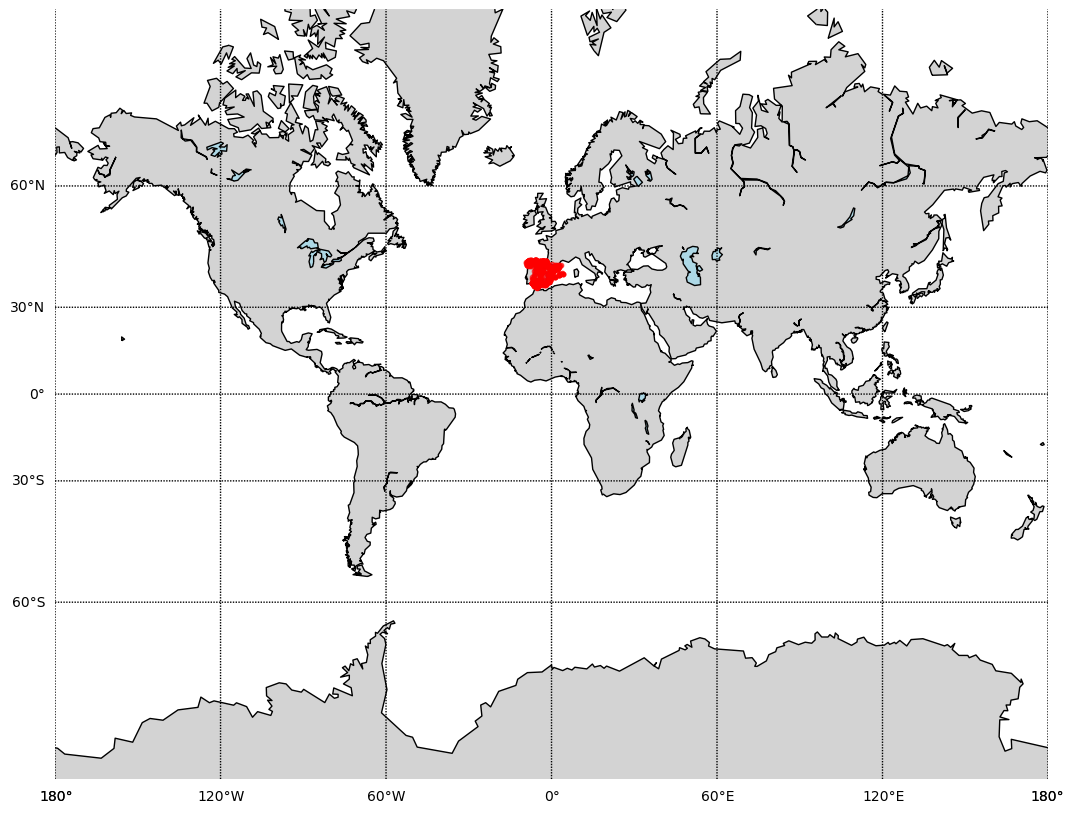

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import networkx as nx

fig = plt.figure(figsize=(14, 10))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')
m.drawcoastlines()
m.fillcontinents(color='lightgray', lake_color='lightblue')
m.drawparallels(range(-90, 91, 30), labels=[1,0,0,0])
m.drawmeridians(range(-180, 181, 60), labels=[0,0,0,1])
m.drawmapboundary(fill_color='lightblue')

G = nx.Graph()

for source_node, target_node in zip(source_nodes, target_nodes):
    source_coord = coordenadas.iloc[source_node][['LATITUD_G', 'LONGITUD_G']]
    target_coord = coordenadas.iloc[target_node][['LATITUD_G', 'LONGITUD_G']]
    
    x_source, y_source = m(source_coord['LONGITUD_G'], source_coord['LATITUD_G'])
    x_target, y_target = m(target_coord['LONGITUD_G'], target_coord['LATITUD_G'])
    
    G.add_node(source_node, pos=(x_source, y_source))
    G.add_node(target_node, pos=(x_target, y_target))
    G.add_edge(source_node, target_node)

pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, node_size=10, node_color='red', edge_color='blue', with_labels=False, alpha=0.6)

plt.show()

In [14]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data


features_columns_y = ['C6H6', 'CO', 'NO2', 'NOx', 'O3', 'PM10', 'PM25', 'SO2']
features_columns = [col for col in df.columns if col not in ['FECHA', 'coord_id', 'LATITUD_G', 'LONGITUD_G', 'time'] + features_columns_y]
unique_times = sorted(df['FECHA'].unique())

start_index = 6  
end_index = len(unique_times) - 7 

for i in range(start_index, end_index + 1):
    past_times = unique_times[i - 6:i + 1]
    future_times = unique_times[i + 1:i + 7]

    current_snapshot = df[df['FECHA'].isin(past_times)]
    future_snapshot = df[df['FECHA'].isin(future_times)]

    x_data = current_snapshot.pivot_table(index='coord_id', columns='FECHA', values=features_columns).fillna(0)
    y_data = future_snapshot.pivot_table(index='coord_id', columns='FECHA', values=features_columns_y).fillna(0)

    x_flat = x_data.values.reshape(-1, 7 * len(features_columns))  
    y_flat = y_data.values.reshape(-1, 6 * len(features_columns_y)) 

    x_tensor = torch.tensor(x_flat, dtype=torch.float)
    y_tensor = torch.tensor(y_flat, dtype=torch.float)
    if edge_index.max() >= x_tensor.size(0):
            print("Índice fuera de límites encontrado en edge_index.")
            print(edge_index)
    snapshot_data = Data(x=x_tensor, edge_index=edge_index, edge_attr=edge_attr, y=y_tensor)

    file_name = f'Dades/Snapshots/snapshot_{i}.pt'
    torch.save(snapshot_data, file_name)

    print(f'Snapshot {i} guardado como {file_name} con la forma {snapshot_data}.')


Snapshot 6 guardado como Dades/Snapshots/snapshot_6.pt con la forma Data(x=[512, 427], edge_index=[2, 3498], edge_attr=[3498, 1], y=[512, 12]).
Snapshot 7 guardado como Dades/Snapshots/snapshot_7.pt con la forma Data(x=[512, 427], edge_index=[2, 3498], edge_attr=[3498, 1], y=[512, 12]).
Snapshot 8 guardado como Dades/Snapshots/snapshot_8.pt con la forma Data(x=[512, 427], edge_index=[2, 3498], edge_attr=[3498, 1], y=[512, 12]).
Snapshot 9 guardado como Dades/Snapshots/snapshot_9.pt con la forma Data(x=[512, 427], edge_index=[2, 3498], edge_attr=[3498, 1], y=[512, 12]).
Snapshot 10 guardado como Dades/Snapshots/snapshot_10.pt con la forma Data(x=[512, 427], edge_index=[2, 3498], edge_attr=[3498, 1], y=[512, 12]).
Snapshot 11 guardado como Dades/Snapshots/snapshot_11.pt con la forma Data(x=[512, 427], edge_index=[2, 3498], edge_attr=[3498, 1], y=[512, 12]).
Snapshot 12 guardado como Dades/Snapshots/snapshot_12.pt con la forma Data(x=[512, 427], edge_index=[2, 3498], edge_attr=[3498, 1], 